# Verification : comparing forecasts and real data

Data used : Open-Meteo's forecasts for 2023-11-15 to 2023-11-22 obtained on 2023-11-15, Open-Meteo's historic data for 2023-11-15 to 2023-11-22 and meteoblue's historic data averages.

Open-Meteo's data is at location ["latitude": 48.81452162820077, "longitude": 2.3948078406657114], specific point in Ivry-sur-Seine corresponding to our school, ESME. <br>
Meteoblue's data is an average for Ivry-sur-Seine, at location [48.82, 2.38].

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/data/')
from make_dataset import create_session, create_historic_dataset

In [8]:
forecast_file = "../data/forecast_2023-11-23_hourly.csv"

forecast_df = pd.read_csv(forecast_file, index_col=0)
historic_df = create_historic_dataset(
        params={
            "latitude": 48.81452162820077,
            "longitude": 2.3948078406657114,
            "hourly": ["temperature_2m", 
                "relative_humidity_2m", 
                "wind_speed_10m",
                "wind_direction_10m",
                "wind_speed_80m",
                "wind_direction_80m",
                "apparent_temperature",
                "surface_pressure",
                "cloud_cover",
                "precipitation", 
                "weather_code"
                ],
        },
        file_path="../data/")
# historic_df = pd.read_csv("../data/historic_hourly.csv", index_col=0)
forecast_df["date"] = pd.to_datetime(forecast_df["date"])
historic_df["date"] = pd.to_datetime(historic_df["date"])

## Comparing 

['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'wind_direction_10m', 'wind_speed_80m', 'wind_direction_80m', 'apparent_temperature', 'cloud_cover']
temperature_2m


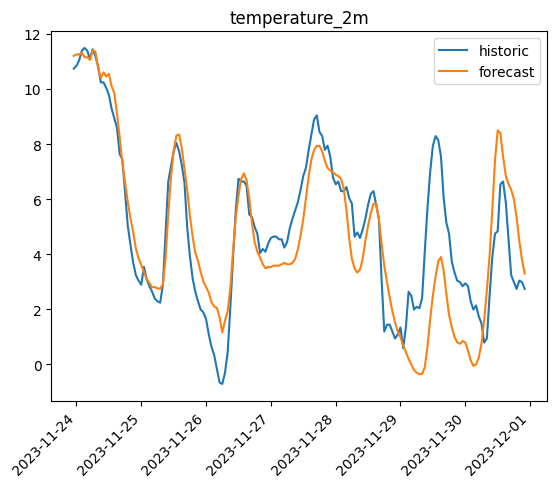

relative_humidity_2m


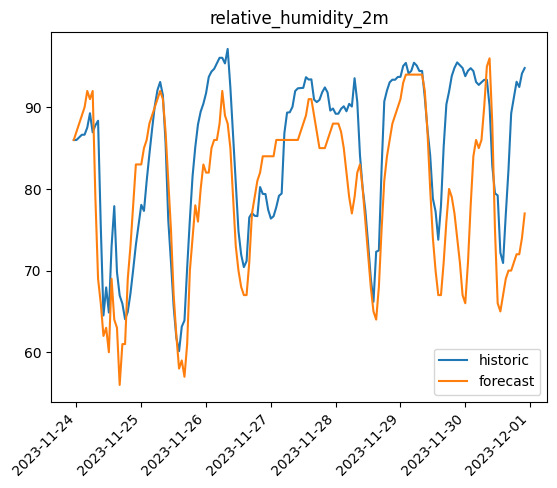

wind_speed_10m


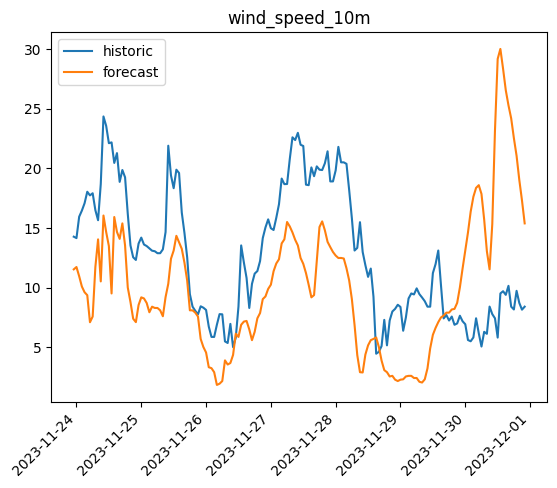

wind_direction_10m


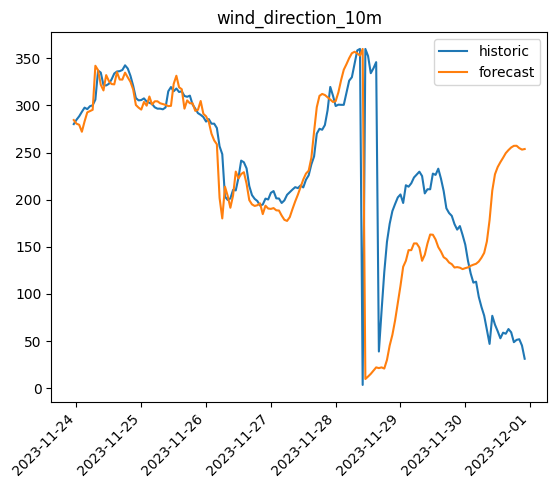

wind_speed_80m


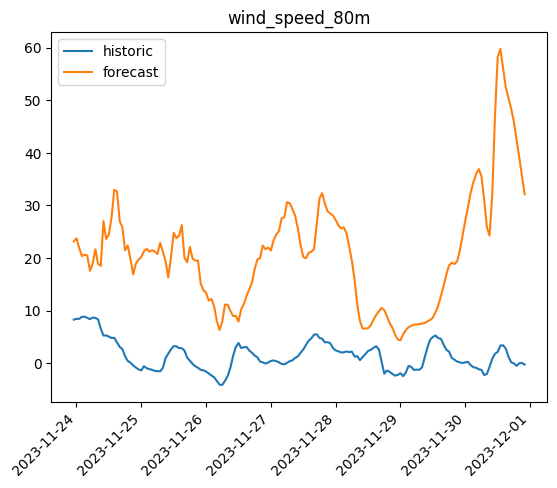

wind_direction_80m


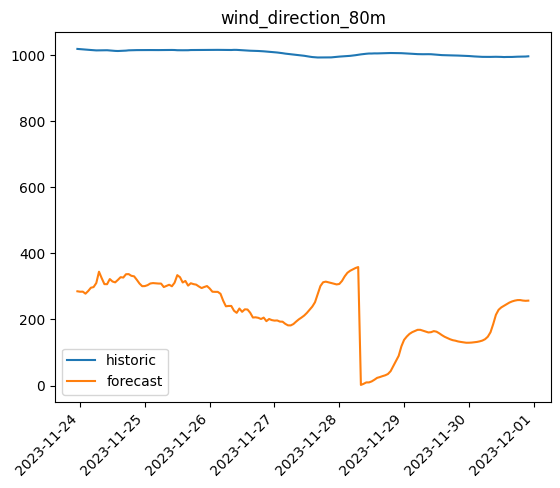

apparent_temperature


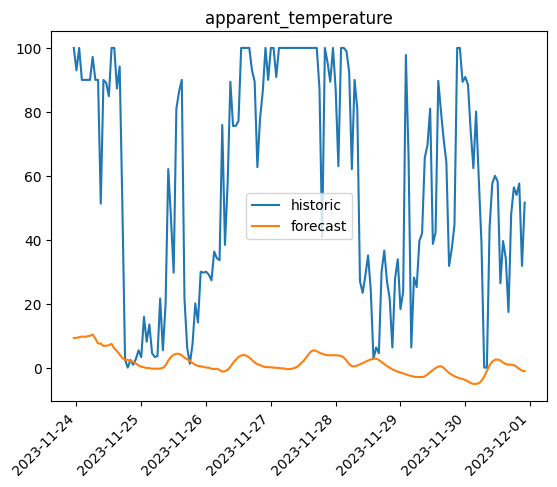

cloud_cover


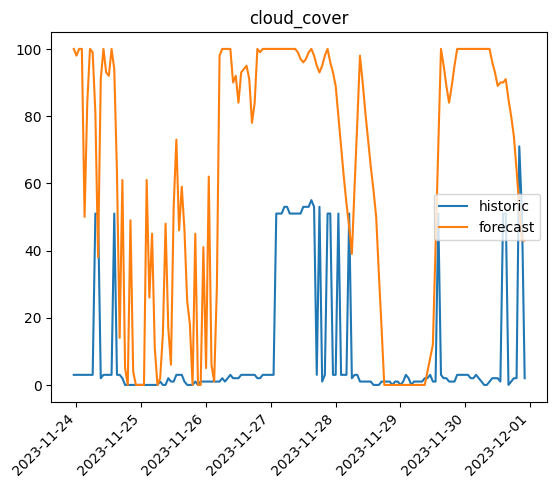

In [9]:
# common_features = set(historic_df.columns).intersection(forecast_df.columns)
# common_features.remove("date")
common_features = [f for f in historic_df.columns if f in forecast_df.columns and f != "date"]
print(common_features)
for feature in common_features:
    print(feature)
    data = [
        historic_df[historic_df["date"].isin(forecast_df["date"])].sort_values("date")[["date", feature]],
        forecast_df[forecast_df["date"].isin(historic_df["date"])].sort_values("date")[["date", feature]]
    ]
    plt.figure()
    for df in data:
        x = df["date"]
        y = df[feature]
        plt.plot(x, y)
    plt.legend(["historic", "forecast"])
    plt.title(feature)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [10]:
historic_df["apparent_temperature"].describe()

count    25680.000000
mean        49.983974
std         38.212490
min          0.000000
25%         12.000000
50%         44.100002
75%         90.000008
max        100.000000
Name: apparent_temperature, dtype: float64

In [11]:
historic_df

,date,temperature_2m,relative_humidity_2m,wind_speed_10m,wind_direction_10m,wind_speed_80m,wind_direction_80m,apparent_temperature,surface_pressure,cloud_cover
0,2021-01-01 00:00:00,-0.157,96.779358,5.351785,317.726379,-3.154688,1003.470825,39.899998,0.0,1.0
1,2021-01-01 01:00:00,-1.257,97.106827,6.109403,315.000092,-4.515862,1003.651733,33.900002,0.0,1.0
2,2021-01-01 02:00:00,-1.857,97.451881,6.638072,310.601227,-5.267882,1004.139709,34.199997,0.0,1.0
3,2021-01-01 03:00:00,-1.957,97.449799,6.409617,308.157257,-5.347898,1004.436401,41.399998,0.0,1.0
4,2021-01-01 04:00:00,-2.157,96.726509,6.618519,315.000092,-5.617810,1004.532837,21.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
25723,2023-12-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25724,2023-12-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25725,2023-12-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25726,2023-12-08 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
forecast_df

,date,temperature_2m,relative_humidity_2m,wind_speed_10m,wind_direction_10m,wind_speed_80m,wind_direction_80m,apparent_temperature,pressure_msl,cloud_cover,precipitation,weather_code,is_day
0,2023-11-23 23:00:00,11.2065,86.0,11.525623,284.47034,23.143827,285.33334,9.251688,1023.7,100.0,0.0,3.0,0.0
1,2023-11-24 00:00:00,11.2565,87.0,11.720751,280.61960,23.749088,284.03625,9.332809,1023.3,98.0,0.0,3.0,0.0
2,2023-11-24 01:00:00,11.2565,88.0,10.948973,279.46225,21.915693,284.26456,9.491747,1021.6,100.0,0.0,3.0,0.0
3,2023-11-24 02:00:00,11.3065,89.0,10.086427,272.04535,20.364674,278.13000,9.727613,1021.5,100.0,0.0,3.0,0.0
4,2023-11-24 03:00:00,11.1565,90.0,9.605998,282.99463,20.620806,286.22028,9.652798,1020.6,50.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2023-11-30 18:00:00,5.9995,71.0,22.530937,257.07400,45.891174,258.69010,0.771378,997.7,74.0,0.0,2.0,0.0
164,2023-11-30 19:00:00,5.3495,72.0,21.046917,257.15228,42.572950,258.78513,0.267219,998.6,64.0,0.0,1.0,0.0
165,2023-11-30 20:00:00,4.4995,72.0,19.039200,254.64981,39.125893,257.24246,-0.418739,999.5,53.0,0.0,1.0,0.0
166,2023-11-30 21:00:00,3.7995,74.0,17.309973,253.07240,35.538033,256.52682,-0.911877,1000.2,43.0,0.0,1.0,0.0
